In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train = x_train / 255
x_test = x_test / 255

In [4]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

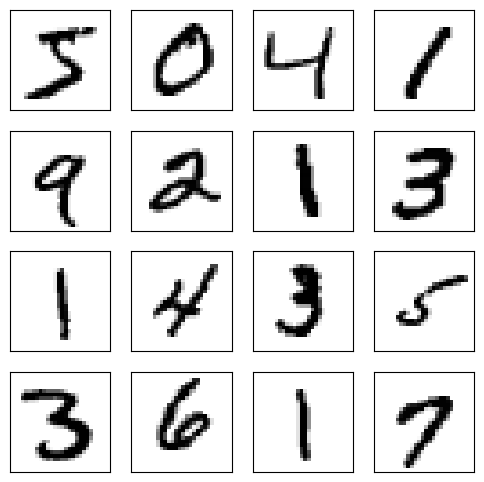

In [5]:
plt.figure(figsize=(6, 6))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

In [6]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(28, 28, 1)),
    # первый слой, разворачивает пиксели картинки в вектор
    keras.layers.Flatten(),
    # добавим 64 нейронов скрытого слоя
    keras.layers.Dense(64, activation='relu'),
    # на выходе будет слой из 10 нейронов с вероятностями
    # того или иного класса, для этого используется воспользуемся
    # функцией актиавации softmax
    keras.layers.Dense(10, activation='softmax')
])

In [7]:
# компилируем НС с заданными функцией потерь,
# оптимизатором градиентного спуска и метриками
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

In [8]:
# обучаем модель
model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8457 - loss: 0.5411 - val_accuracy: 0.9480 - val_loss: 0.1813
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9527 - loss: 0.1620 - val_accuracy: 0.9592 - val_loss: 0.1379
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9668 - loss: 0.1151 - val_accuracy: 0.9643 - val_loss: 0.1185
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9727 - loss: 0.0904 - val_accuracy: 0.9649 - val_loss: 0.1110
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9786 - loss: 0.0724 - val_accuracy: 0.9703 - val_loss: 0.0978


In [9]:
model.evaluate(x_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9685 - loss: 0.1070


[0.09389635920524597, 0.9715999960899353]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Мнение нейронной сети:  4
Верный ответ:  4


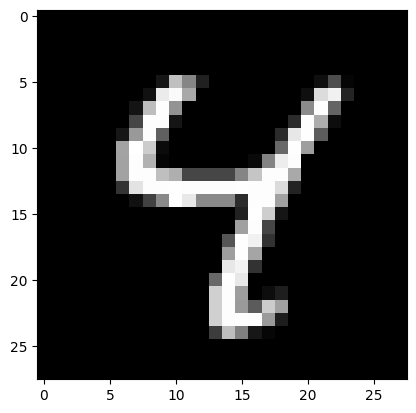

In [ ]:
I = 6  # номер изображения для вывода
plt.imshow(x_test[I].reshape([28, 28]), cmap='gray')  # отрисовка изображения
print("Мнение нейронной сети: ",
      np.argmax(model.predict(
            x_test[I].reshape([1, 28, 28]))))
print("Верный ответ: ", y_test[I])